In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

# Load dataset

In [5]:
lungpollution_df = pd.read_csv('../lung_pollution/data/covid_pollution.csv')

In [6]:
lungpollution_df.shape

(4000, 14)

In [7]:
lungpollution_df.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'cases_per_100k',
       'deaths_per_100k', 'Population density', 'Fully vaccinated'],
      dtype='object')

# Assess normality of features

In [8]:
num_features = lungpollution_df.drop(columns=['county', 'year'])

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35791/2657500905.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35791/2657500905.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35791/2657500905.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_35791/2657500905.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipy

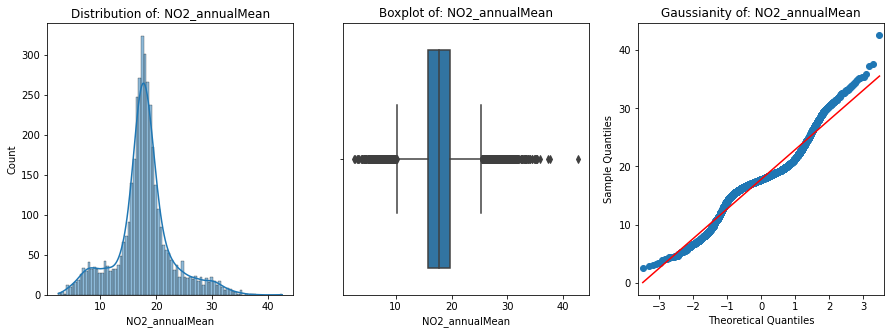

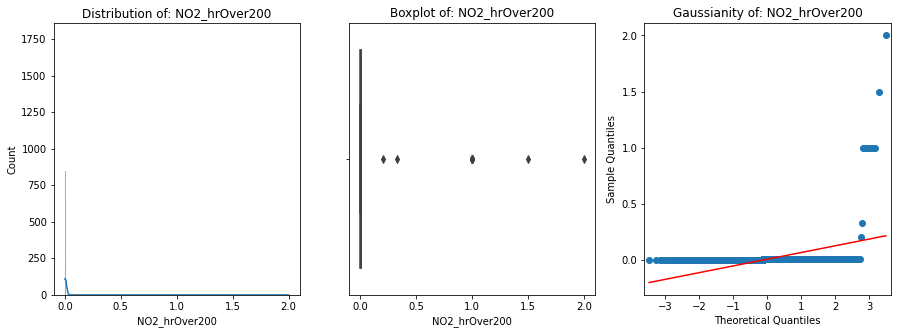

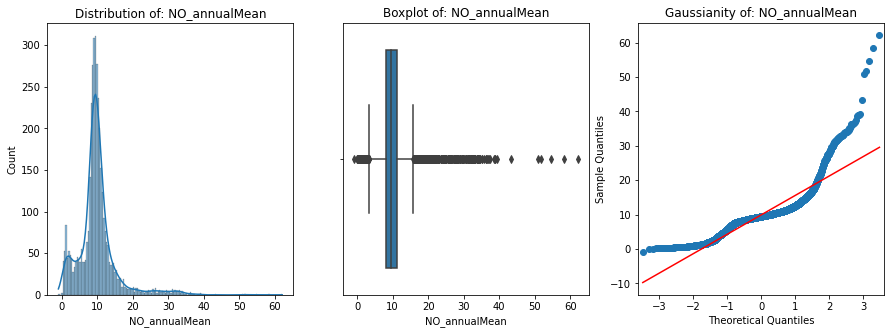

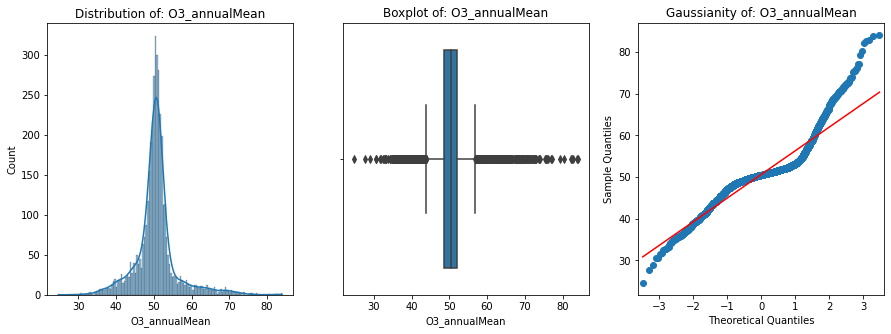

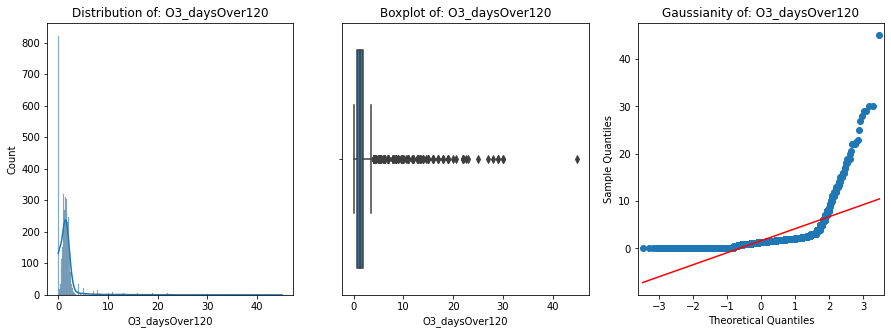

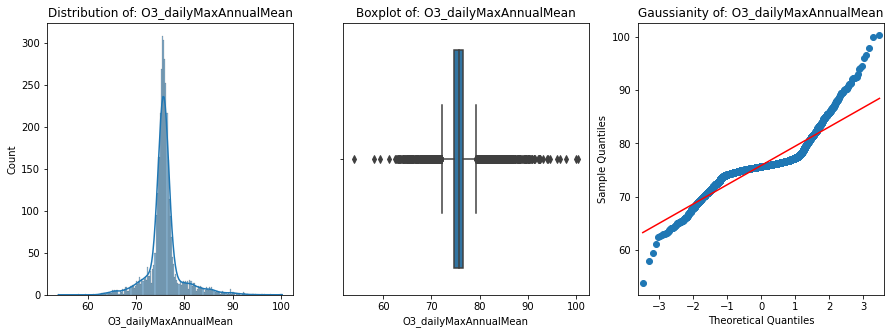

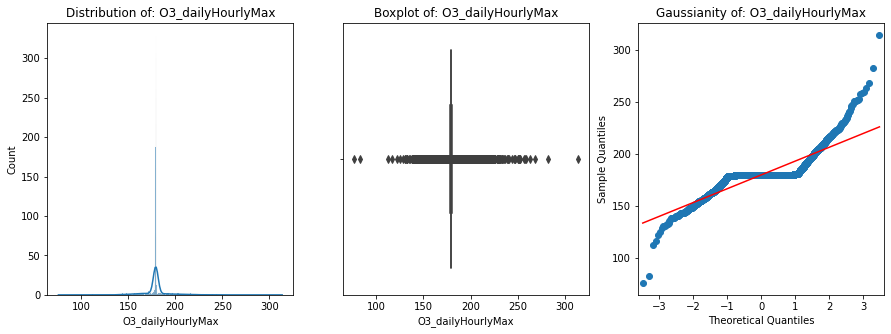

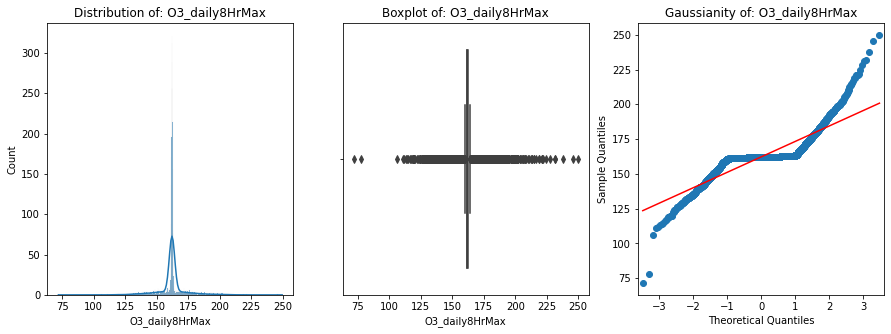

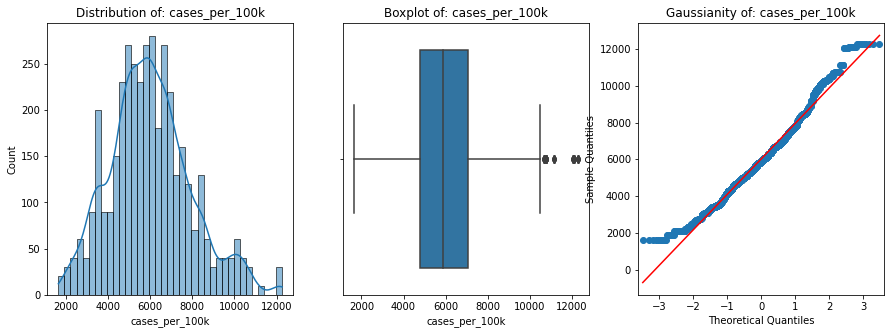

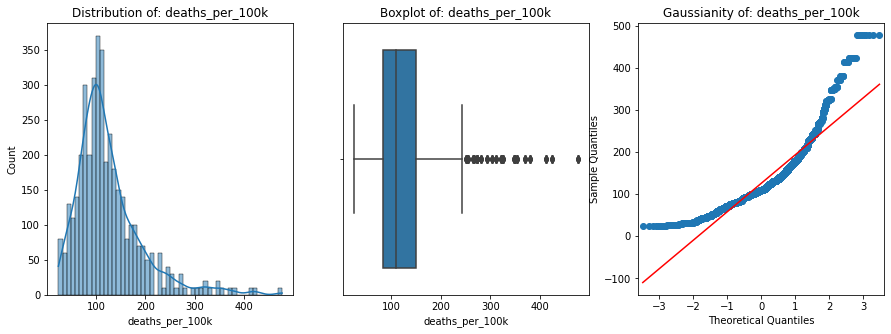

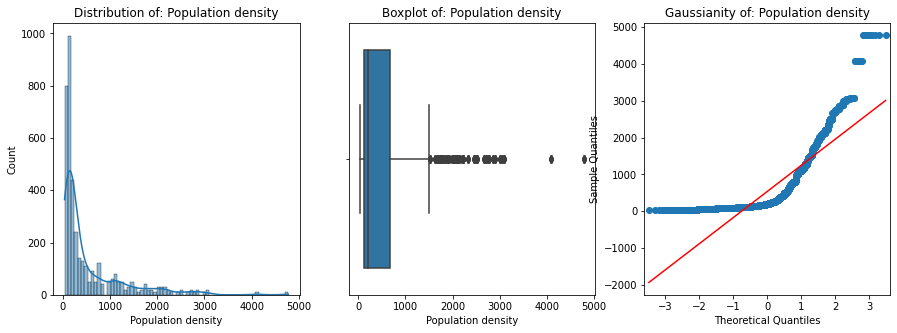

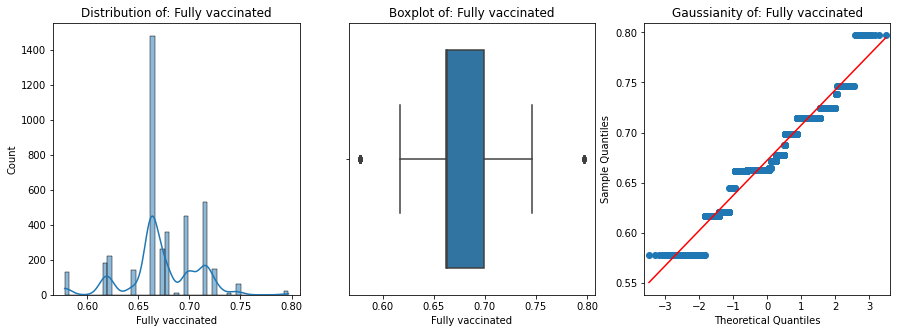

In [11]:
for numerical_feature in num_features.columns:
    
    fig, ax =plt.subplots(1,3,figsize=(15,5))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(x = num_features[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(x = num_features[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(num_features[numerical_feature],line='s',ax=ax[2])
    fig.show()

Numerical features are not normally distributed

# Inspect for outliers

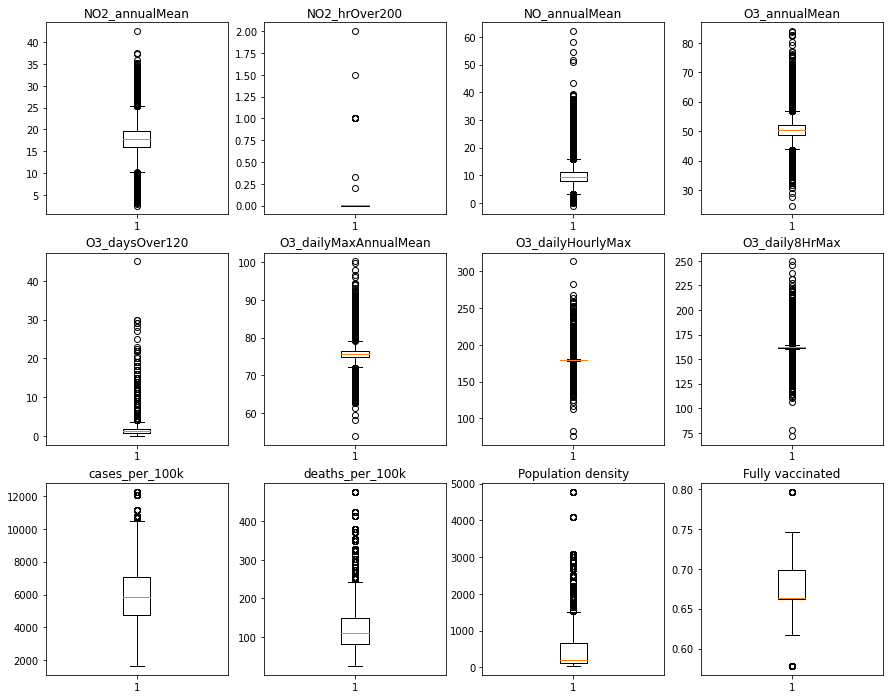

In [18]:
plt.figure(figsize=(15,12))

for i, numerical_feature in enumerate(num_features.columns):
    plt.subplot(3,4,i+1)
    plt.boxplot(num_features[numerical_feature])
#    plt.ylabel(numerical_feature[numerical_feature])
    plt.title(numerical_feature)
plt.show()

Some outliers, but can be real measurements > keep them

# Conclusion for scaling
Use normalization as scaler 
- Does not impact effect of outliers
- does not affect skewness of distributions